<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Concept" data-toc-modified-id="Concept-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Concept</a></span></li><li><span><a href="#Class-Linear" data-toc-modified-id="Class-Linear-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Class Linear</a></span></li><li><span><a href="#Custom-Module" data-toc-modified-id="Custom-Module-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Custom Module</a></span></li><li><span><a href="#Loss" data-toc-modified-id="Loss-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Gradient Descent</a></span></li><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Cost Function</a></span></li><li><span><a href="#Cost-Surface" data-toc-modified-id="Cost-Surface-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Cost Surface</a></span></li></ul></li></ul></div>

# Linear Regression

## Concept

$y = b + wx$

x: predictor (independent) variable

y: target (dependent) variable

b: bias

w: weight

In [1]:
import torch

w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

def forward(x):
    y = w * x + b
    return y

x = torch.tensor([1.0])
yhat = forward(x)

print(yhat)

tensor([1.], grad_fn=<AddBackward0>)


In [2]:
x = torch.tensor([[1.0], [2.0]])
yhat = forward(x)

print(yhat)

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


## Class Linear

To create a linear model, and try to forward input

In [3]:
from torch.nn import Linear

torch.manual_seed(1)

chosen_model = Linear(in_features=1, out_features=1)
print(list(chosen_model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [4]:
x = torch.tensor([0.0])
yhat = chosen_model(x)

print(yhat)

tensor([-0.4414], grad_fn=<AddBackward0>)


In [5]:
x = torch.tensor([[1.0], [2.0]])
yhat = chosen_model(x)

print(yhat)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


## Custom Module
To create a custom model by custom module

In [6]:
import torch.nn as nn

class My_Linear_Model(nn.Module):
    def __init__(self, in_size, out_size):
        super(My_Linear_Model, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out
    

In [7]:
chosen_model = My_Linear_Model(1, 1)

chosen_model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.1939]])),
             ('linear.bias', tensor([0.4694]))])

In [8]:
# Change the parameter manually
# Set b = -0.4414
# Set w = 0.5153

chosen_model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
chosen_model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])

print(list(chosen_model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [9]:
x = torch.tensor([[1.0], [2.0]])
yhat = chosen_model(x)

print(yhat)

tensor([[0.0739],
        [0.5892]], grad_fn=<AddmmBackward>)


In [10]:
### model.state_dict()

print("Python Dictionary:\n", chosen_model.state_dict())
print("================================================================")
print("Keys:\n", chosen_model.state_dict().keys())
print("================================================================")
print("Values:\n", chosen_model.state_dict().values)

Python Dictionary:
 OrderedDict([('linear.weight', tensor([[0.5153]])), ('linear.bias', tensor([-0.4414]))])
Keys:
 odict_keys(['linear.weight', 'linear.bias'])
Values:
 <built-in method values of collections.OrderedDict object at 0x0000000019384540>


## Loss

Assume that:

$x$: size of house

$\hat y = b + wx$: price of house

$Loss(w) = (y-\hat y)^2 = (y_1-wx_1)^2$

E.g., $\hat y=5x$

$P: (4, -2)$

$Loss(w) = (-2-w\cdot 4)^2 $

Try to minimize $Loss(w)$

$\frac{dl(w)}{dw}=0$ 拋物線在斜率為0時有極值

## Gradient Descent

Iteratively minimized the gradien

$w^0$

$w^1=w^0 - \eta \frac{dl(w^0)}{dw}$

$w^2=w^1 - \eta \frac{dl(w^1)}{dw}$

$w^{k+1}=w^k - \eta \frac{dl(w^k)}{dw}$

$\eta$: learning rate

![](https://i.imgur.com/ASJ2NJU.png)

## Cost Function

Average Loss

Batch Gradient Descent


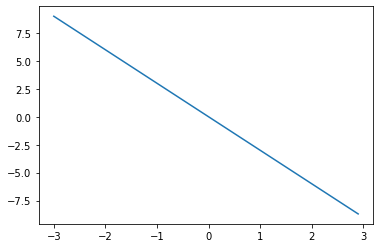

In [11]:
import torch

w = torch.tensor(-10.0, requires_grad=True)

x = torch.arange(-3, 3, 0.1).view(-1, 1) # to change dimension

f = -3 * x

import matplotlib.pyplot as plt

plt.plot(x.numpy(), f.numpy())
plt.show()

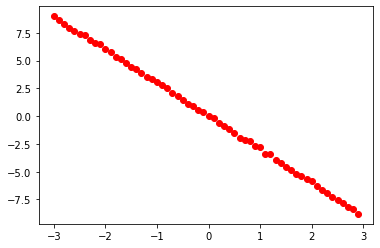

In [12]:
y = f + 0.1 * torch.randn(x.size())

plt.plot(x.numpy(), y.numpy(), 'ro')
plt.show()

$w^{k+1}=w^k - \eta \frac{dl(w^k)}{dw}$

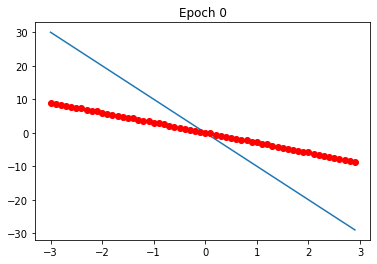

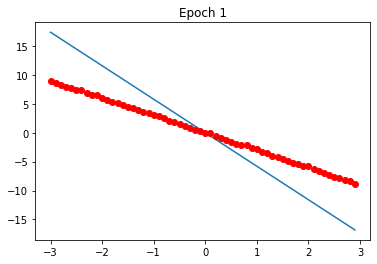

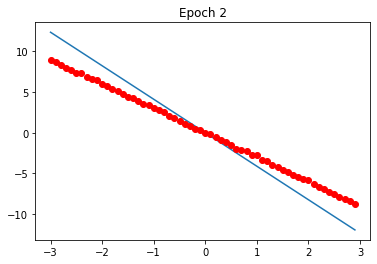

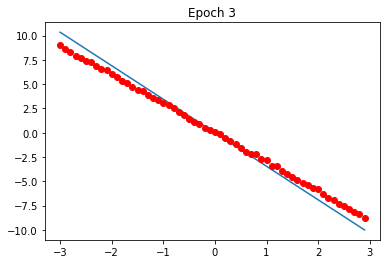

In [13]:
%matplotlib inline

def forward(x):
    return w * x

## Cost Function
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

# Set learing rate = 0.1
lr = 0.1

COST = []

yhat = None

for epoch in range(4):
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    
    # print(w.grad)
    
    w.data = w.data - lr * w.grad.data
    
    w.grad.data.zero_() # Because Pytorch calculates grad in a iterative manner
    
    COST.append(loss.item())
    
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.numpy(), 'ro')
    plt.show()

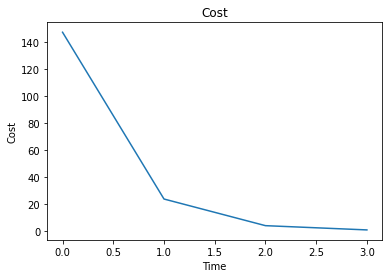

In [14]:
plt.plot(COST)
plt.title("Cost")
plt.xlabel("Time")
plt.ylabel("Cost")
plt.show()

## Cost Surface

$l(w, b) = \frac{1}{N}\sum_{n=1}^{N}(y_n-wx_n-b)^2$

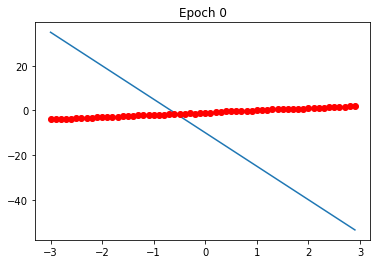

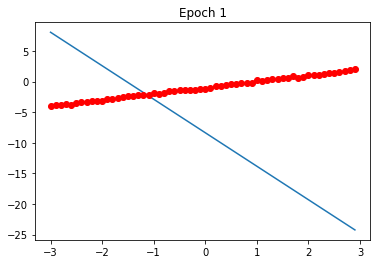

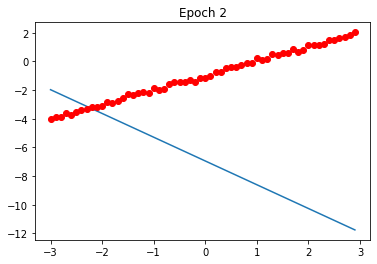

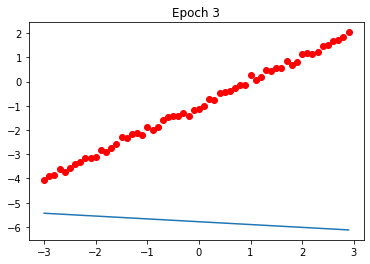

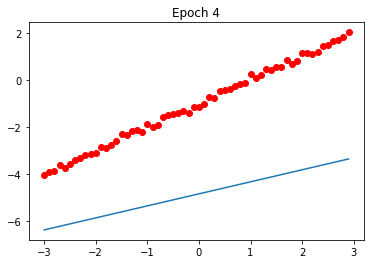

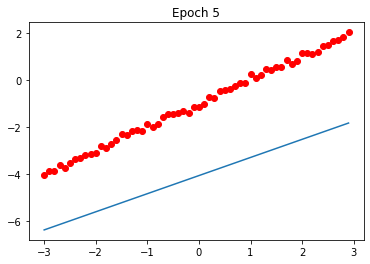

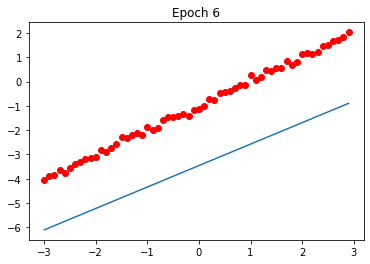

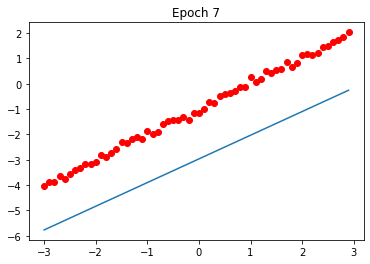

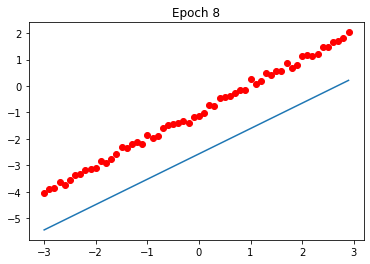

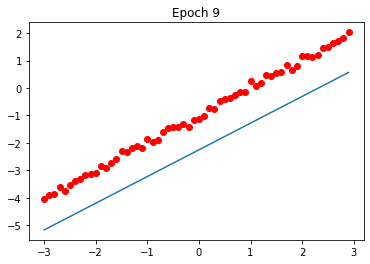

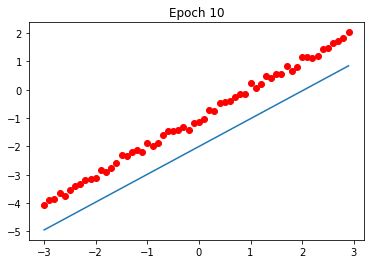

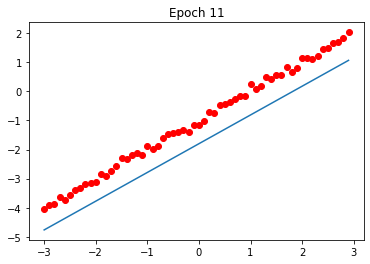

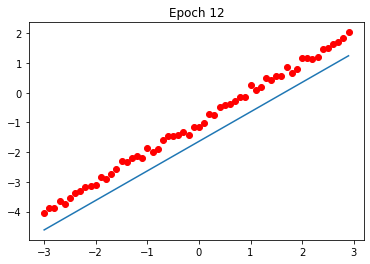

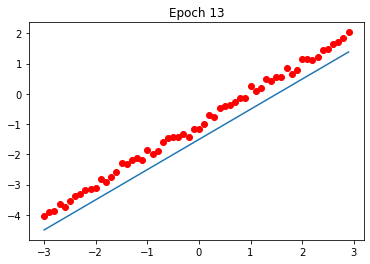

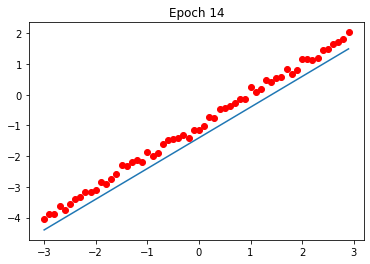

In [15]:
%matplotlib inline


w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
x = torch.arange(-3, 3, 0.1).view(-1, 1) # to change dimension

f = 1 * x -1
y = f + 0.1 * torch.randn(x.size())


def forward(x):
    return w * x + b

## Cost Function
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

# Set learing rate = 0.1
lr = 0.1

COST = []

yhat = None

for epoch in range(15):
    yhat = forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    
    # print(w.grad)
    
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_() # Because Pytorch calculates grad in a iterative manner
    
    b.data = b.data - lr * b.grad.data
    b.grad.data.zero_()
    
    COST.append(loss.item())
    
    plt.title('Epoch %d' % epoch)
    plt.plot(x.numpy(), yhat.detach().numpy())
    plt.plot(x.numpy(), y.numpy(), 'ro')
    plt.show()

$ \nabla l(w,b) =  \begin{bmatrix}  \frac{\partial l(w,b)}{\partial w}   \\\frac{\partial l(w,b)}{\partial b} \end{bmatrix}$